In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# /kaggle/input/song-popularity/dataset.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Описание признаков

1. **Unnamed: 0** — столбец, дублирующий индекс

2. **track_id** — уникальный идентификатор трека. Используется для идентификации песни в базе данных.

3. **artists** — имя исполнителя или группы, записавшей трек.

4. **album_name** — название альбома, в который входит трек.

5. **track_name** — название трека.

6. **popularity** — показатель популярности трека, где большее значение означает более популярный трек. Значения в диапазоне от 0 до 100.

7. **duration_ms** — длительность трека в миллисекундах.

8. **explicit** — флаг, указывающий на наличие ненормативной лексики. Значение `True` означает, что трек содержит контент для взрослых, `False` — что не содержит.

9. **danceability** — коэффициент танцевальности. Это числовой показатель от 0 до 1, отражающий, насколько трек подходит для танцев.

10. **energy** — показатель «энергии» трека. Значение от 0 до 1, где высокий уровень энергии означает быстрый и громкий трек.

11. **key** — тональность трека, представлена в числовом виде.

12. **loudness** — средняя громкость трека в децибелах (dB), где более высокое значение соответствует более громкому треку.

13. **mode** — режим тональности, где `1` — мажор, `0` — минор.

14. **speechiness** — показатель речевого контента. Значение от 0 до 1, где более высокие значения означают большую долю слов в треке.

15. **acousticness** — показатель акустичности, от 0 до 1. Чем ближе к 1, тем выше вероятность, что трек является акустическим.

16. **instrumentalness** — показатель инструментальности, от 0 до 1, где значения ближе к 1 указывают на отсутствие вокала. Небольшие значения могут означать вокал или речь.

17. **liveness** — показатель «живости» трека, от 0 до 1. Более высокие значения указывают на присутствие аудитории и элементы живого исполнения.

18. **valence** — показатель настроения трека, от 0 до 1. Высокие значения означают «позитивное» звучание, тогда как низкие значения связаны с меланхоличным или негативным настроением.

19. **tempo** — темп трека.

20. **time_signature** — размер трека, который представляет количество долей в одном такте.

21. **track_genre** — жанр трека, такой как "acoustic", "pop", "rock", и т.д.


# Загрузка датасета

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
%matplotlib inline

Проверяю на чём обучается модель: CPU или GPU

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"Модель обучается на GPU: {device_name}")
else:
    print("Модель обучается на CPU")

Модель обучается на CPU


In [ ]:
BASE_URL = '/content/drive/MyDrive/Программирование нейронных сетей/songs_spotify/'

In [ ]:
data = pd.read_csv(f'{BASE_URL}dataset_spotify_init.csv')

In [ ]:
data_initial = data.copy(deep=True)

In [ ]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
data.shape

(114000, 21)

In [ ]:
data_initial.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
data.shape

(114000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# Обработка DataFrame

In [ ]:
data['popularity'].value_counts()

,count
popularity,
0,16020
22,2354
21,2344
44,2288
1,2140
...,...
96,7
94,7
95,5


50 - 94

In [ ]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
data.shape

(113999, 21)

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numerical_features

['Unnamed: 0',
 'popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  int64  
 2   artists           113999 non-null  int64  
 3   album_name        113999 non-null  int64  
 4   track_name        113999 non-null  int64  
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

# Аналитика

In [ ]:
import numpy as np

In [ ]:
sns.set(style="whitegrid")

## Распределение популярности треков

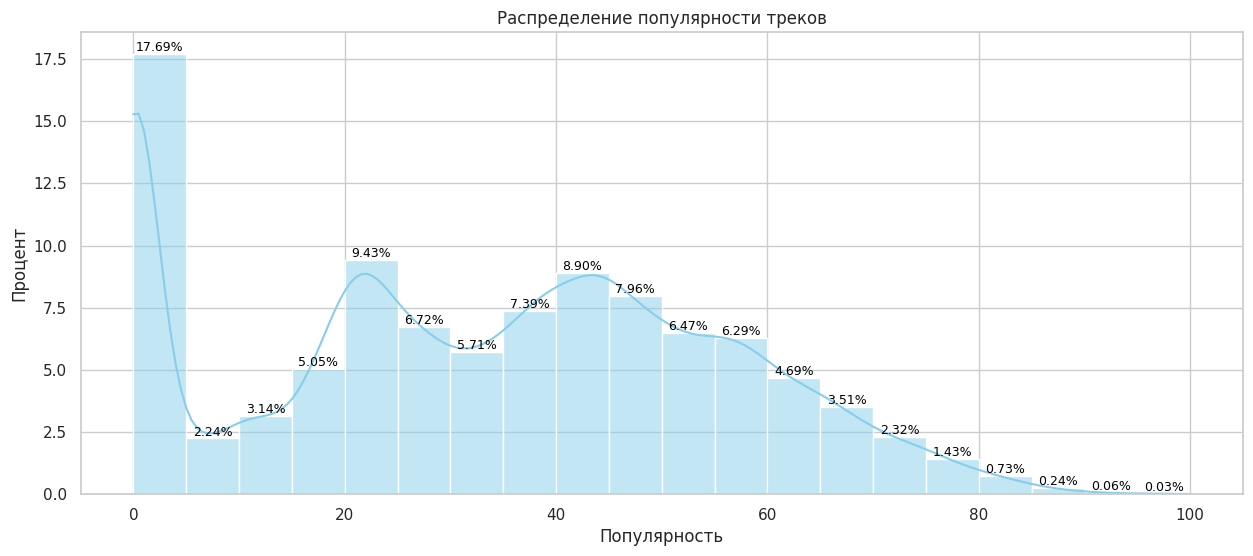

In [ ]:
plt.figure(figsize=(15, 6))
histplot = sns.histplot(data['popularity'], bins=20, kde=True, color='skyblue', stat='percent')
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Процент')

for p in histplot.patches:
    height = p.get_height()
    # Добавляем подпись, только если высота больше 0
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}%',
                 ha='center', va='bottom', fontsize=9, color='black')

plt.show()

Видно, что подавляющее большинство треков с популярностью равной 0. Также много треков с популярностью от 20 до 60. С популярностью выше 80 всего около 1% треков

## Процентное соотношение треков с ненормативной лексикой и без

In [ ]:
explicit_counts = data['explicit'].value_counts()
explicit_counts

,count
explicit,
False,104252
True,9747


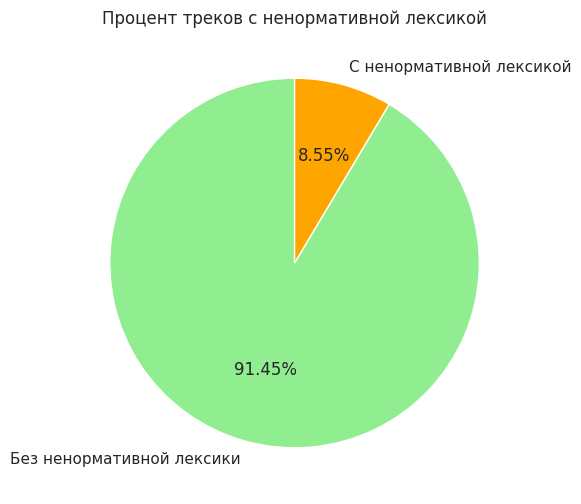

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(explicit_counts, labels=['Без ненормативной лексики', 'С ненормативной лексикой'],
        autopct='%.2f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('Процент треков с ненормативной лексикой')
plt.show()


Видно, что треков без ненормативной лексики более чем в 10 раз больше, чем с ненормативной лексикой

## Влияние наличия ненормативной лексики в треке на его среднюю популярность

In [ ]:
explicit_popularity = data_initial.groupby('explicit')['popularity'].mean().reset_index()

<ipython-input-31-d764ef992629>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=explicit_popularity, x='explicit', y='popularity', palette='viridis')


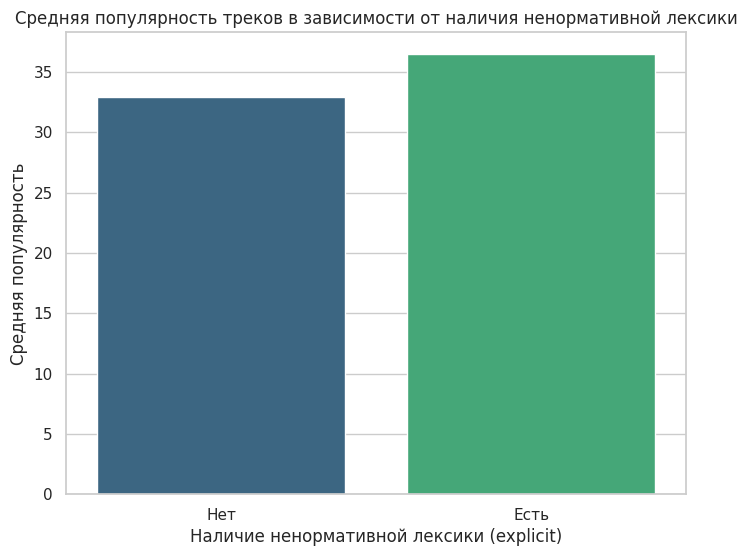

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=explicit_popularity, x='explicit', y='popularity', palette='viridis')

plt.title('Средняя популярность треков в зависимости от наличия ненормативной лексики')
plt.xlabel('Наличие ненормативной лексики (explicit)')
plt.ylabel('Средняя популярность')
plt.xticks([0, 1], labels=['Нет', 'Есть'])
plt.show()

На диаграмме показана средняя популярность треков с и без ненормативной лексики. Однако важно учитывать, что количество треков без ненормативной лексики значительно превышает количество треков с её наличием, более чем в 10 раз. Это может влиять на точность результатов. Несмотря на это, видно, что треки с ненормативной лексикой имеют более высокую среднюю популярность по сравнению с треками без неё

## Распределение треков по длительности в минутах

In [ ]:
duration_min = data['duration_ms'] / 60000
max_duration = duration_min.max()
bins = [0, 1, 2, 3, 4, 5, 10, max_duration]

print(duration_min.head())
print('Maximum duration:', max_duration)

0    3.844433
1    2.493500
2    3.513767
3    3.365550
4    3.314217
Name: duration_ms, dtype: float64
Maximum duration: 87.28825


In [ ]:
duration_counts = duration_min.value_counts(bins=bins, sort=False)
duration_counts

,count
"(-0.001, 1.0]",872
"(1.0, 2.0]",5427
"(2.0, 3.0]",26136
"(3.0, 4.0]",42384
"(4.0, 5.0]",22832
"(5.0, 10.0]",15745
"(10.0, 87.288]",603


In [ ]:
labels = ['<1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '10+ мин']

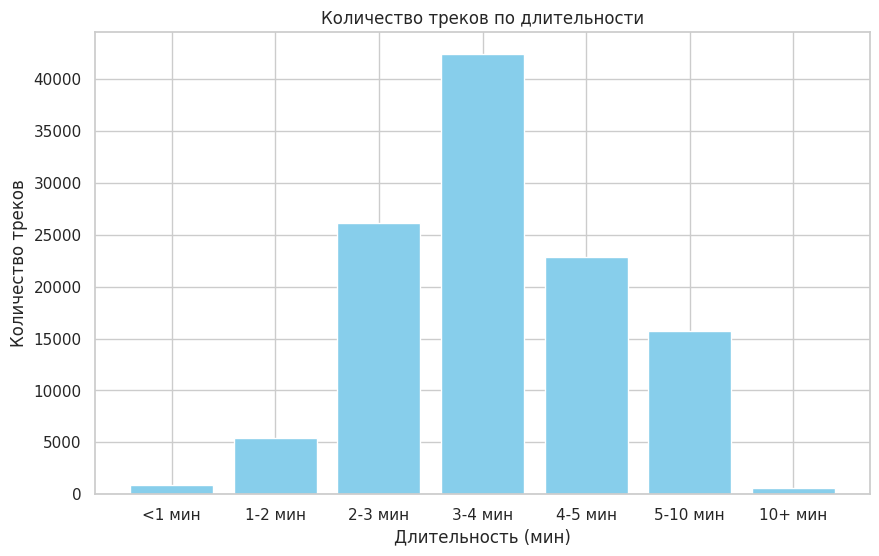

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x=labels, height=duration_counts.values, color='skyblue')
plt.title('Количество треков по длительности')
plt.xlabel('Длительность (мин)')
plt.ylabel('Количество треков')
plt.show()

Видно, что больше всего треков длительностью 3-4 минуты. Также достаточно много треков длительностью 2-3 минуты и 4-10 минут

## Влияние длительности на популярность трека

In [ ]:
duration_min = data_initial['duration_ms'] / 60000
bins = [0, 1, 2, 3, 4, 5, 10, duration_min.max()]
labels = ['<1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '10+ мин']

data_initial['duration_category'] = pd.cut(duration_min, bins=bins, labels=labels)

duration_popularity = data_initial.groupby('duration_category')['popularity'].mean().reset_index()

<ipython-input-36-cb932e5c02b8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_popularity = data_initial.groupby('duration_category')['popularity'].mean().reset_index()


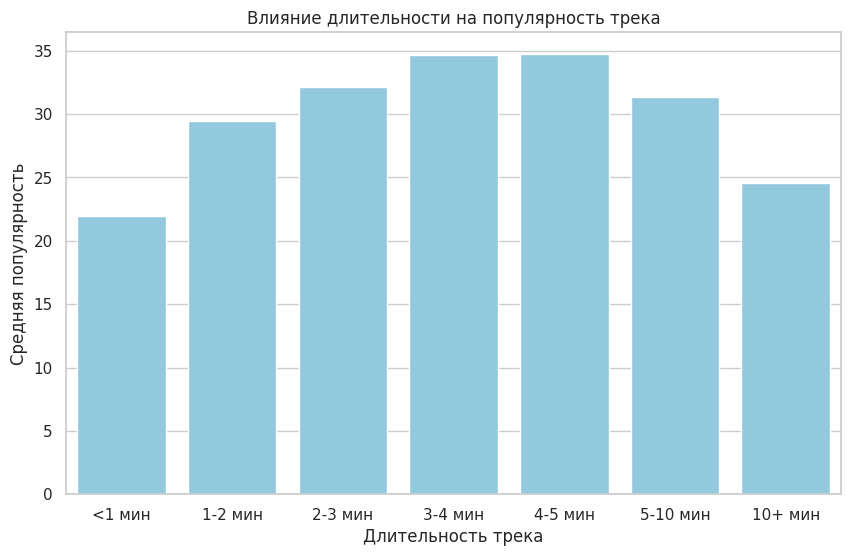

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=duration_popularity, x='duration_category', y='popularity', color='skyblue')

plt.title('Влияние длительности на популярность трека')
plt.xlabel('Длительность трека')
plt.ylabel('Средняя популярность')
plt.show()

Наибольшая средняя популярность у треков с длительностью от 3 до 5 минут. Следом идут треки с длительностью 2-3 минуты и треки длиной 5-10 минут. Худшая популярность у самых коротких треков

##  Распределение треков по жанрам

In [ ]:
genre_counts = data_initial['track_genre'].value_counts()
genre_counts

,count
track_genre,
acoustic,1000
punk-rock,1000
progressive-house,1000
power-pop,1000
pop,1000
...,...
folk,1000
emo,1000
electronic,1000


Сделаю предположение, что на каждый жанр приходится по 1000 треков

In [ ]:
maximum_tracks_by_genre = genre_counts.max()
minimum_tracks_by_genre = genre_counts.min()

print(f'Максимум треков по жанрам: {maximum_tracks_by_genre}')
print(f'Минимум треков по жанрам: {minimum_tracks_by_genre}')

Максимум треков по жанрам: 1000
Минимум треков по жанрам: 1000


Предположение подтвердилось. На каждый жанр приходится по 1000 треков

## Влияние жанра на популярность

In [ ]:
genre_popularity = data_initial.groupby('track_genre')['popularity'].mean().reset_index()

# Сортируем по средней популярности (от популярного к непопулярному)
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

top_genres = genre_popularity.head(3)
bottom_genres = genre_popularity.tail(3)

selected_genres = pd.concat([top_genres, bottom_genres])

<ipython-input-41-780cf1d450f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_genres, x='track_genre', y='popularity', palette='viridis')


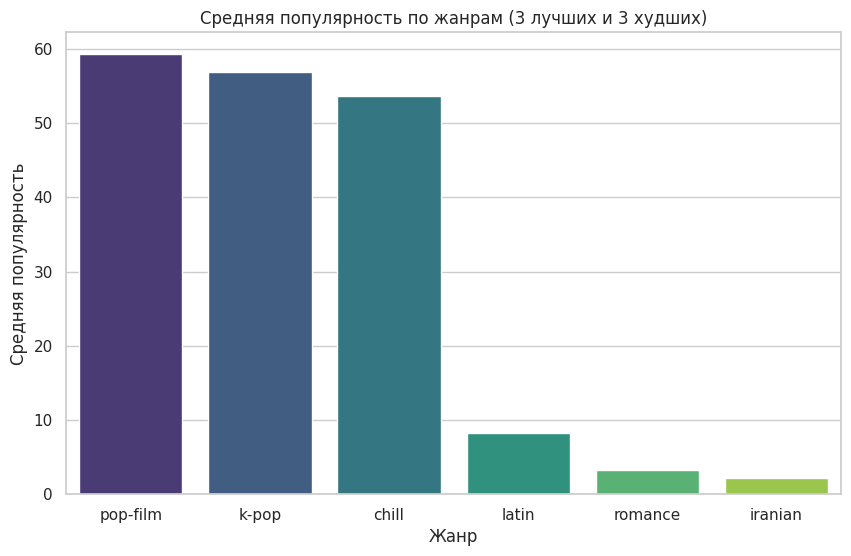

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_genres, x='track_genre', y='popularity', palette='viridis')

plt.title('Средняя популярность по жанрам (3 лучших и 3 худших)')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
# plt.xticks(rotation=45)  # Поворот меток на оси X для удобства
plt.show()

Видно, что:

* наибольшая средняя популярность у таких жанров: *pop-film*, *k-pop* и *chill*
* Худшая средняя популярность у таких жанров: *latin*, *romance* и *iranian*

Из этого можно сделать вывод, что жанр сильно влияет на популярность

## Влияние настроения трека на популярность

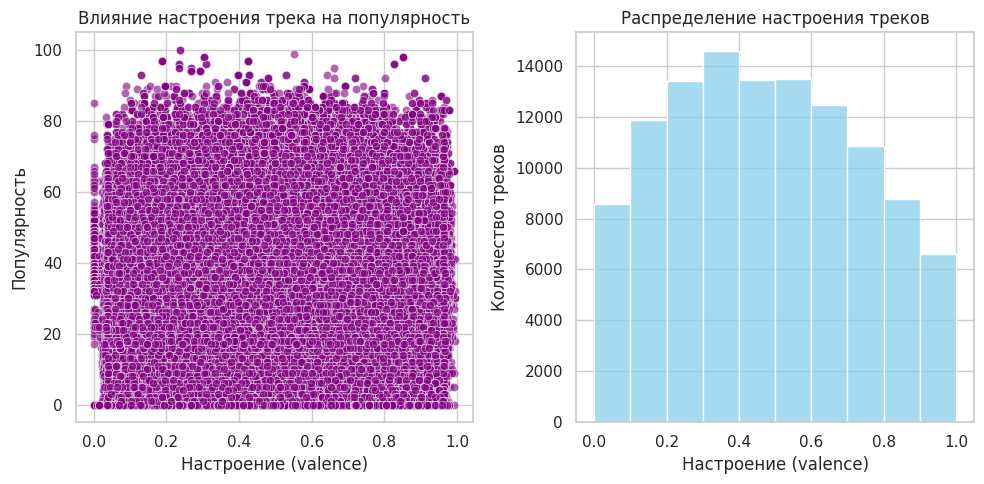

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='valence', y='popularity', data=data_initial, color='purple', alpha=0.6)
plt.title('Влияние настроения трека на популярность')
plt.xlabel('Настроение (valence)')
plt.ylabel('Популярность')

plt.subplot(1, 2, 2)
sns.histplot(data=data_initial['valence'], bins=np.arange(0, 1.1, 0.1), color='skyblue')
plt.title('Распределение настроения треков')
plt.xlabel('Настроение (valence)')
plt.ylabel('Количество треков')

plt.tight_layout()
plt.show()

* Можно сделать вывод, что настроение трека не влияет на его популярность, так как при любом настроении его популярность кардинально не меняется.
* Треков с грустным звучанием немного больше, чем треков с позитивным звучанием

## Влияние танцевальности и энергичности на популярность

In [ ]:
bins = np.arange(0, 1.1, 0.1)

data_initial['dance_bin'] = pd.cut(data_initial['danceability'], bins=bins)
data_initial['energy_bin'] = pd.cut(data_initial['energy'], bins=bins)

heatmap_data = data_initial.groupby(['dance_bin', 'energy_bin']).popularity.mean().reset_index()

heatmap_pivot = heatmap_data.pivot(index='dance_bin', columns='energy_bin', values='popularity')

<ipython-input-43-df3b0e7bfbbf>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = data_initial.groupby(['dance_bin', 'energy_bin']).popularity.mean().reset_index()


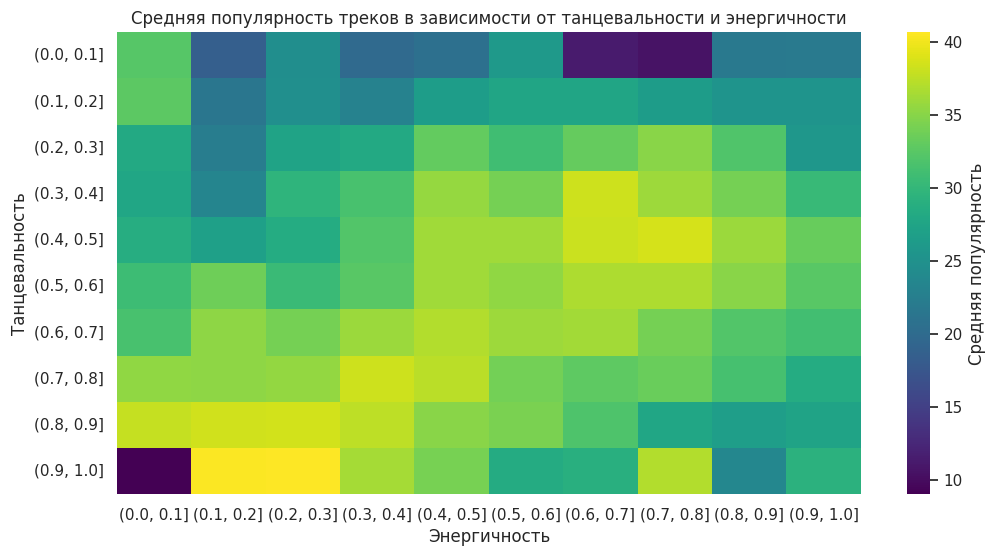

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_pivot,
    cmap='viridis',
    cbar=True,
    cbar_kws={'label': 'Средняя популярность'}
)

plt.title('Средняя популярность треков в зависимости от танцевальности и энергичности')
plt.xlabel('Энергичность')
plt.ylabel('Танцевальность')
plt.show()

Видно, что наибольшая средняя популярность достигается при энергичности трека в диапазоне (0.1, 0.3] и танцевальности трека в диапазоне (0.9, 1.0]

Можно сказать, что данная комбинация признаков влияет на популярность

## Построение корреляционной матрицы всех признаков

**Корреляция** измеряет силу и направление линейной связи между двумя переменными. В контексте анализа данных она помогает понять, насколько одна переменная может предсказывать изменения в другой.

**Интерпретация значений корреляции:**

1. Положительная корреляция:
  * Если корреляция положительная (больше 0), это означает, что по мере увеличения одной переменной увеличивается и другая
2. Отрицательная корреляция:
  * Если корреляция отрицательная (меньше 0), это означает, что при увеличении одной переменной другая уменьшается
3. Отсутствие корреляции:
  * Значение корреляции, близкое к 0, говорит о том, что между переменными нет линейной связи

In [ ]:
correlation_matrix = data.corr()

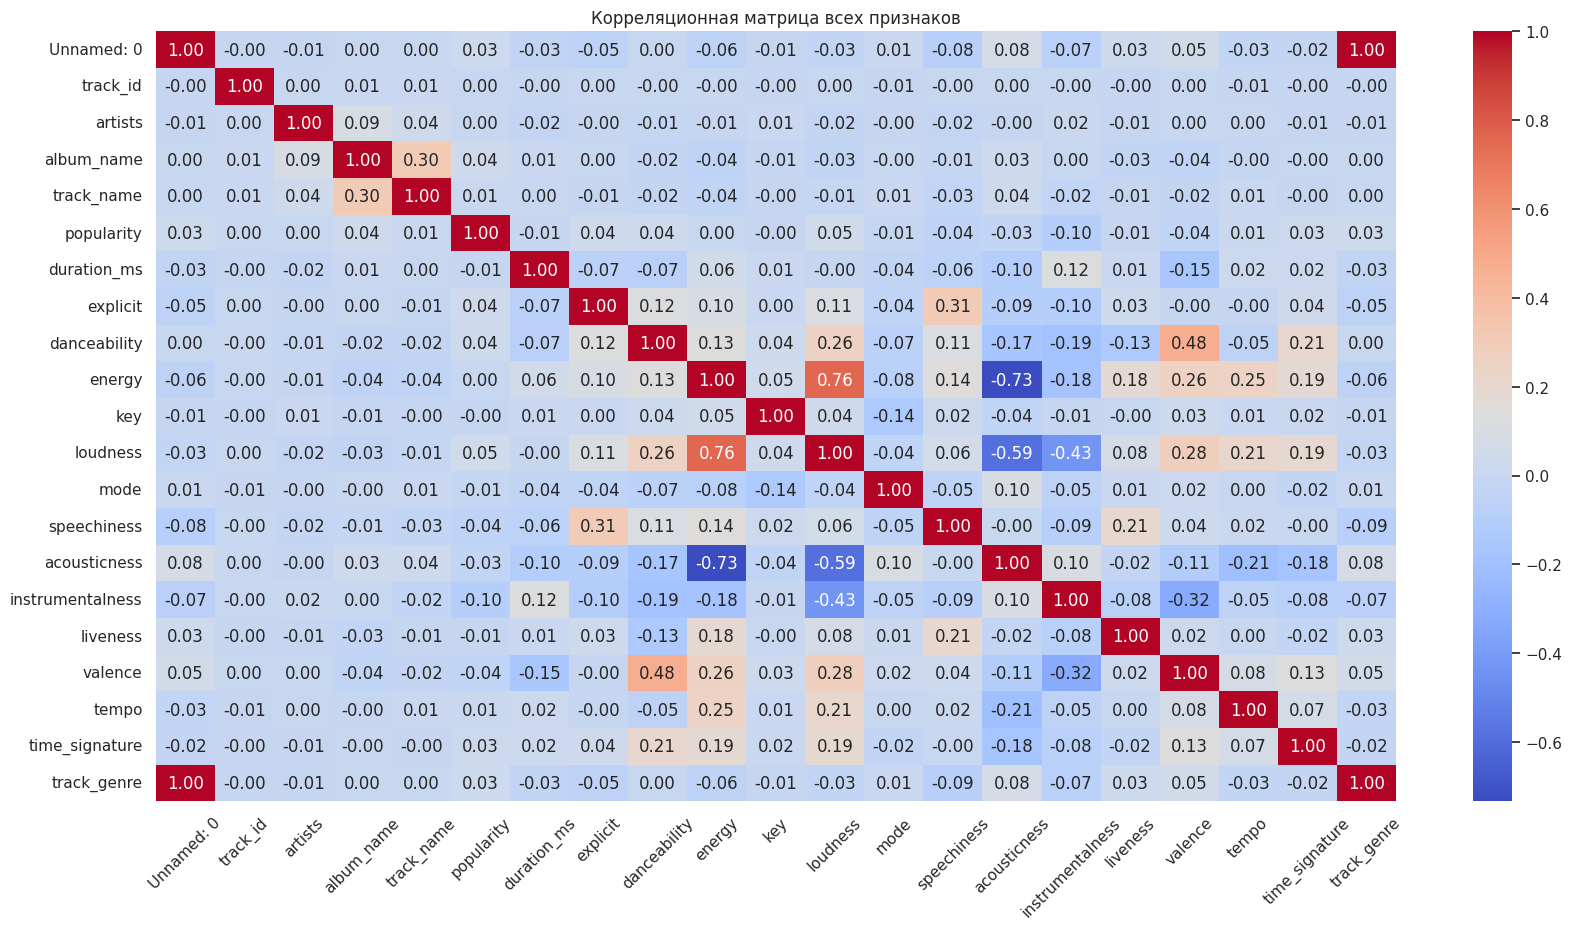

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица всех признаков")
plt.xticks(rotation=45)
plt.show()

На основании корреляционной матрицы можно сделать следующие выводы:
  1. Популярность трека не коррелирует ни с одним из других признаков. Из этого можно сделать вывод, что между популярностью и другими признаками отсутствует линейная зависимость
  2. Положительная (прямая) корреляция:
    * ***loudness*** и ***energy*** имеют значимую положительную корреляцию (0.76), что указывает на то, что энергичные треки являются более громкими
    * ***valence*** и ***danceability*** имеют умеренную положительную корреляцию (0.48). Это говорит о том, что позитивные треки чаще бывают танцевальными
    * ***speechiness*** и ***explicit*** имеют положительную корреляцию (0.31), это свидетельствует о том, что в треках, в которых большое количество слов, скорее всего будет ненормативная лексика. В пример можно привести такой жанр как рэп
  3. Отрицательная (обратная) корреляция:
    * ***energy*** и ***acousticness*** имеют значительную отрицательную корреляцию (-0.73), что показывает: чем энергичнее трек, тем меньше вероятность, что он будет акустическим
    * ***acousticness*** и ***loudness*** имеют сильную отрицательную корреляцию (-0.59). Это значит, что акустический треки имеют более тихое звучание
    * ***instrumentalness*** и ***loudness*** имеют отрицательную корреляцию (-0.43), указывая на то, что инструментальные треки обычно имеют тихое звучание

  **Итог:**

  Взаимосвязь между ***loudness*** и ***energy***, ***valence*** и ***danceability***, а также ***speechiness*** и ***explicit*** подчеркивает, что эти признаки тесно связаны. Отрицательные корреляции ***acousticness*** с ***energy*** и ***loudness*** подтверждают интуитивное понимание, что более акустическая музыка обычно менее энергична и громка. Отрицательная корреляция между ***instrumentalness*** и ***loudness*** показывает, что инструментальные треки обычно менее тихие

## Влияние количества слов и наличия ненормативной лексики в треке на популярность

In [ ]:
speech_explicit_score = data['speechiness'] * data['explicit']

In [ ]:
speech_explicit_score.value_counts()

,count
0.0000,104252
0.1020,68
0.0872,65
0.0554,62
0.1710,59
...,...
0.5640,1
0.0263,1
0.5150,1
0.6910,1


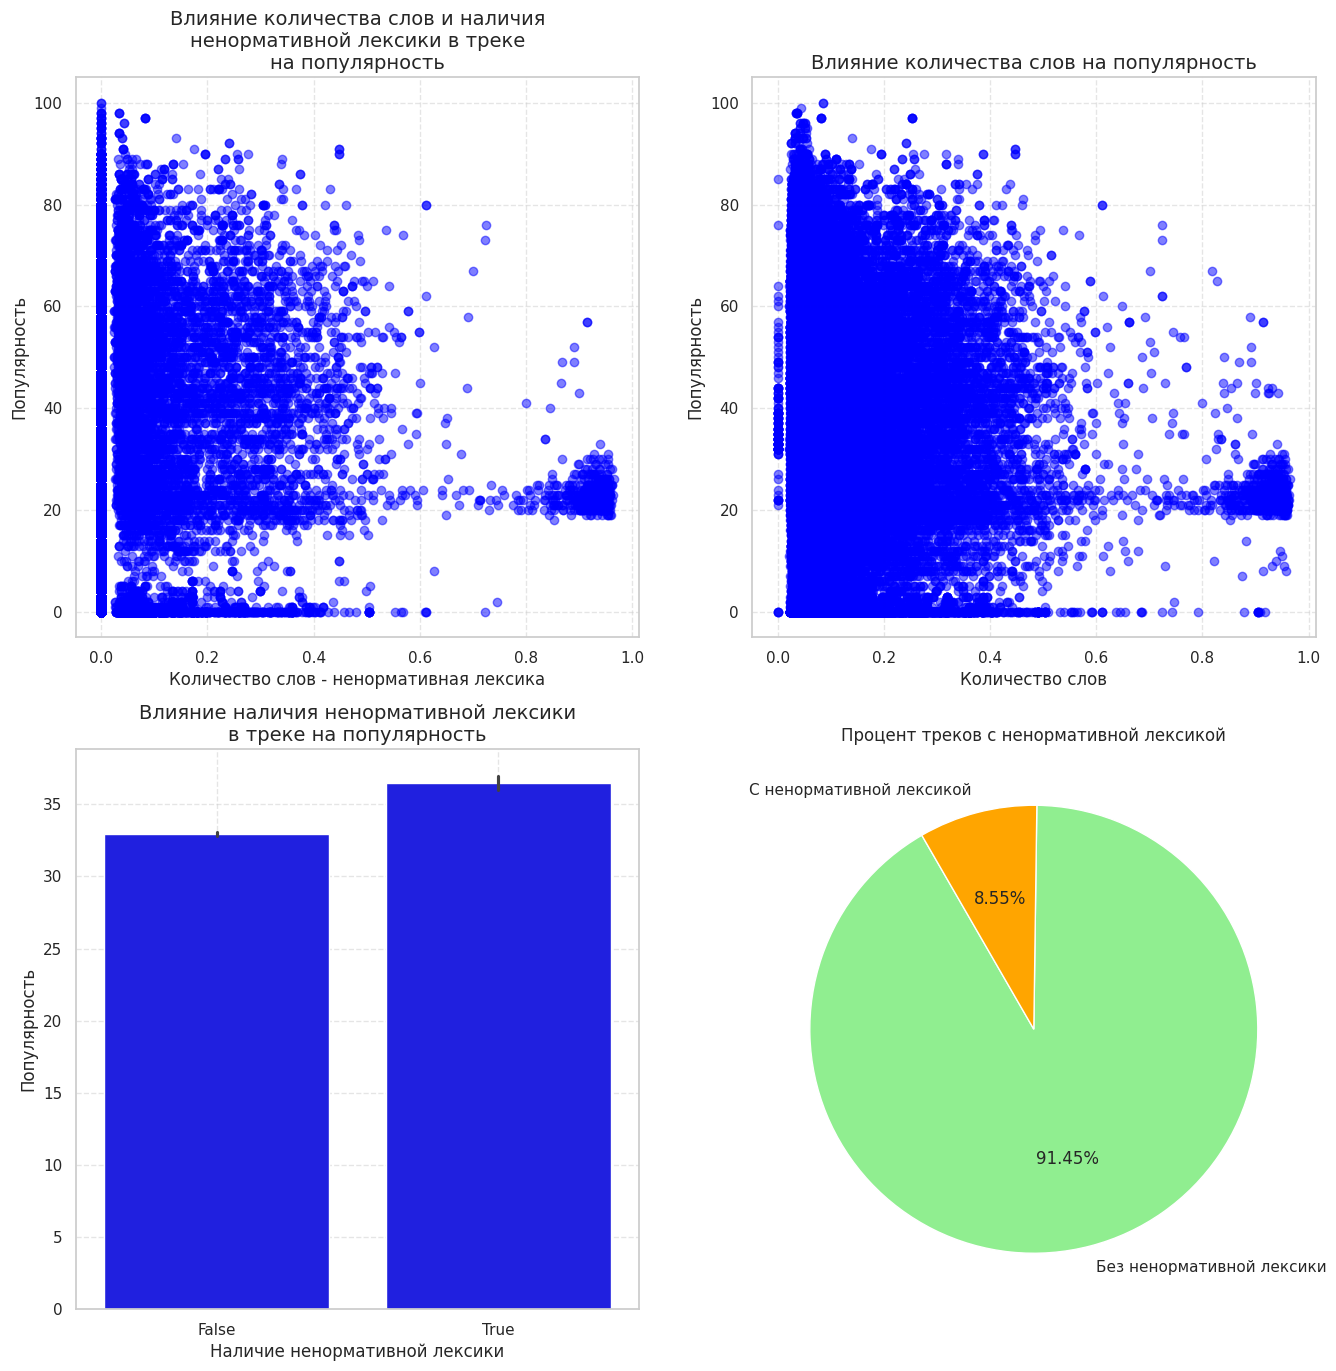

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.scatter(speech_explicit_score, data['popularity'], alpha=0.5, c='blue')
plt.title("Влияние количества слов и наличия\nненормативной лексики в треке\nна популярность", fontsize=14)
plt.xlabel("Количество слов - ненормативная лексика", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
plt.scatter(data['speechiness'], data['popularity'], alpha=0.5, c='blue')
plt.title("Влияние количества слов на популярность", fontsize=14)
plt.xlabel("Количество слов", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 3)
sns.barplot(data=data, x='explicit', y='popularity', color='blue')
plt.title("Влияние наличия ненормативной лексики\nв треке на популярность", fontsize=14)
plt.xlabel("Наличие ненормативной лексики", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 4)
plt.pie(data['explicit'].value_counts(), labels=['Без ненормативной лексики', 'С ненормативной лексикой'],
        autopct='%.2f%%', startangle=120, colors=['lightgreen', 'orange'])
plt.title('Процент треков с ненормативной лексикой')
plt.show()

plt.tight_layout()
plt.show()

Видно, что наибольшую популярность получают треки, у которых либо отсутствует ненормативная лексика, либо треки, у которых ненормативная лексика присутствует, но количество слов в песне минимально. Также можно увидеть, что треков без ненормативной лексики намного больше чем с её наличием

Из этого можно сделать вывод, что признак "Количество слов в треке и наличие ненормативной лексики" некорректен, так как треков без ненормативной лексики более чем в 10 раз больше, чем с её наличием

In [ ]:
popularity_speech_explicit_corr = data['popularity'].corr(speech_explicit_score)
print(f'Корреляция между "Количество слов - ненормативная лексика" и популярностью: {popularity_speech_explicit_corr:.2f}')

Корреляция между "Количество слов - ненормативная лексика" и популярностью: 0.00


Корреляция между ***popularity*** и ***speech_explicit_score*** равна 0. Это говорит о том, что нет линейной зависимости между данными признаками

## Влияние настроения и танцевальности трека на популярность

In [ ]:
valence_dancebility = data['valence'] * data['danceability']

In [ ]:
valence_dancebility.head()

,0
0,0.483340
1,0.112140
2,0.052560
3,0.038038
4,0.103206


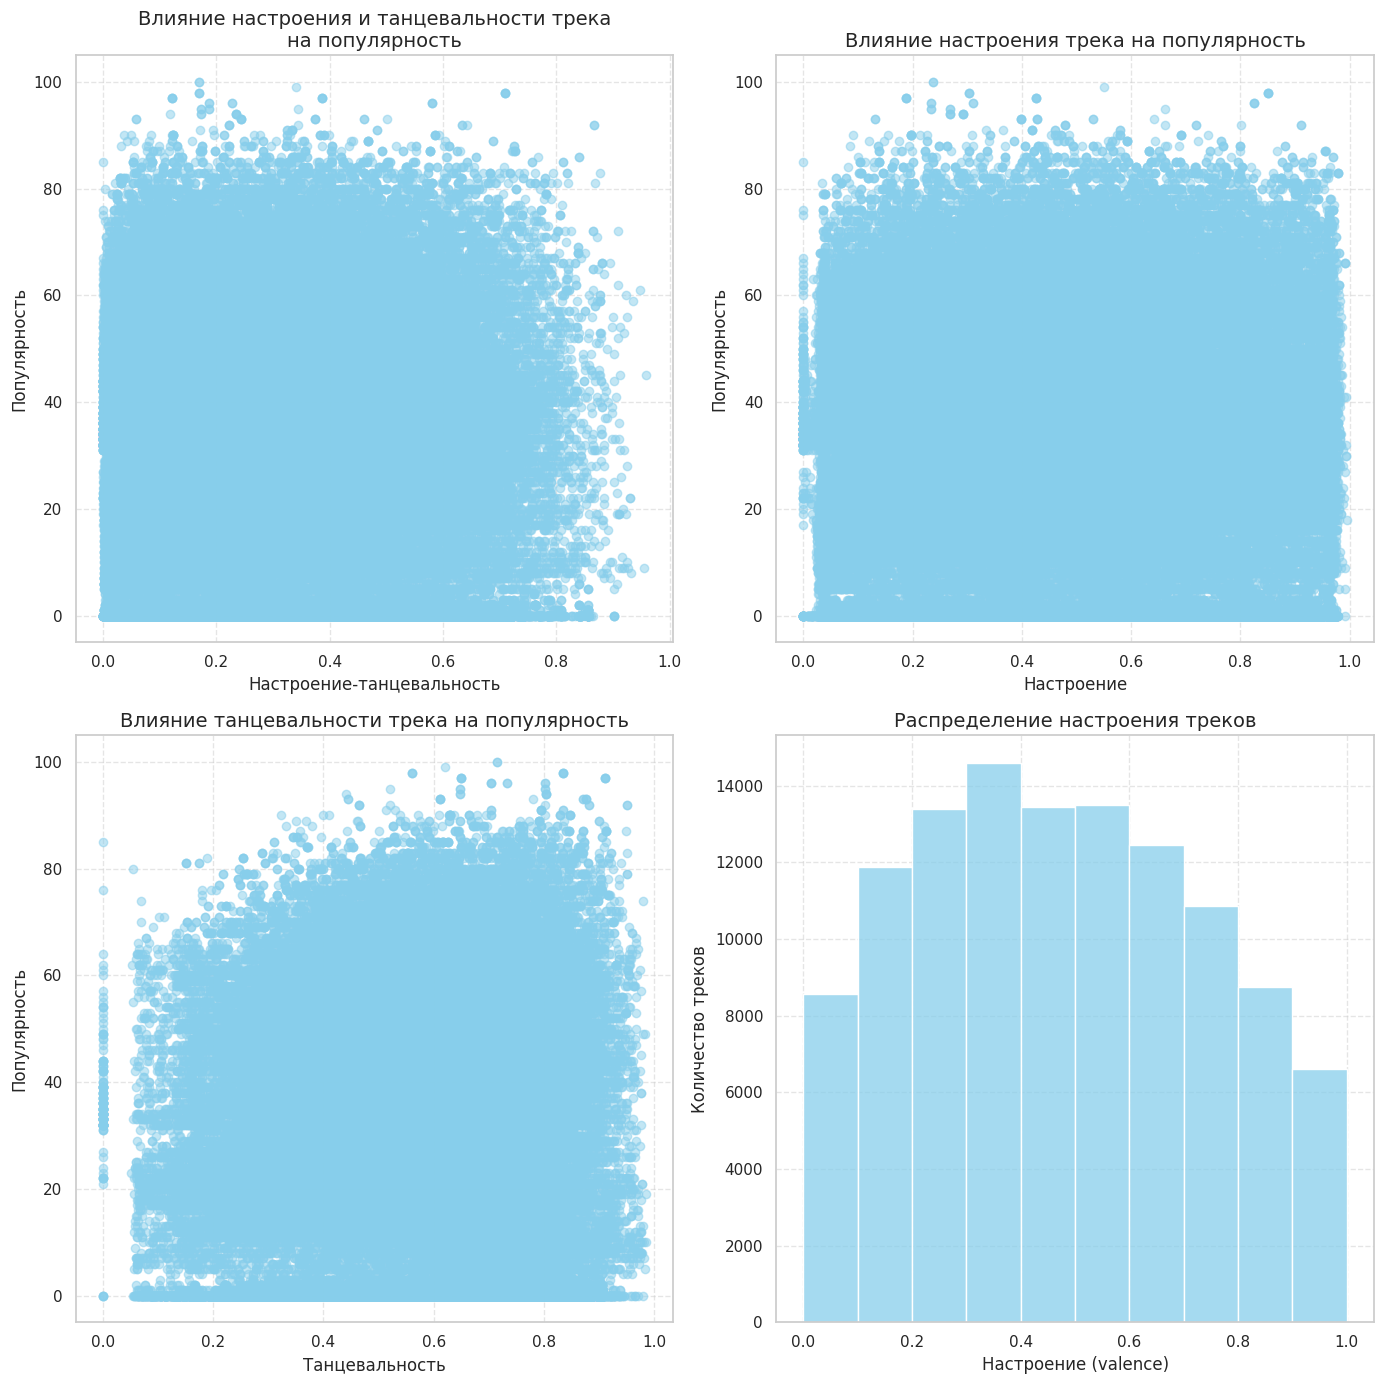

In [ ]:
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.scatter(valence_dancebility, data['popularity'], alpha=0.5, c='skyblue')
plt.title("Влияние настроения и танцевальности трека\nна популярность", fontsize=14)
plt.xlabel("Настроение-танцевальность", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
plt.scatter(data['valence'], data['popularity'], alpha=0.5, c='skyblue')
plt.title("Влияние настроения трека на популярность", fontsize=14)
plt.xlabel("Настроение", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 3)
plt.scatter(data['danceability'], data['popularity'], alpha=0.5, c='skyblue')
plt.title("Влияние танцевальности трека на популярность", fontsize=14)
plt.xlabel("Танцевальность", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 4)
sns.histplot(data=data_initial['valence'], bins=np.arange(0, 1.1, 0.1), color='skyblue')
plt.title('Распределение настроения треков', fontsize=14)
plt.xlabel('Настроение (valence)', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

1. Настроение трека не влияет на популярность, но есть выбросы, достигающие наивысшей популярности. Много треков с настроение (0.2; 0.6)
2. Чем трек танцевальнее, тем выше у него популярность. Наивысшие значения популярности достигаются при танцевальности выше 0.5
3. Совокупный признак "Настроение-танцевальность" показывает, что при значении 0.6 и выше показатель популярности снижается

Вывод:

Данный признак может быть полезен для модели, но он не является важнейшим

In [ ]:
valence_danceability_corr = data['popularity'].corr(valence_dancebility)
print(f'Корреляция между "Настроение-танцевальность" и популярностью: {valence_danceability_corr:.2f}')

Корреляция между "Настроение-танцевальность" и популярностью: -0.04


Корреляция между ***popularity*** и ***valence_danceability*** равна -0.04. Это говорит о том, что нет линейной зависимости между данными признаками

# Создание новых признаков

## Замена признака duration_ms на duration_min

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  int64  
 2   artists           113999 non-null  int64  
 3   album_name        113999 non-null  int64  
 4   track_name        113999 non-null  int64  
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [ ]:
duration_min = data['duration_ms'] / 60000
max_duration = duration_min.max()

bins = [0, 1, 2, 3, 4, 5, 10, max_duration]
labels = ['0-1 min', '1-2 min', '2-3 min', '3-4 min', '4-5 min', '5-10 min', '10+ min']

duration_category = pd.cut(duration_min, bins=bins, labels=labels, include_lowest=True)

Закодирую длительность трека с помощью One Hot Encoding

In [ ]:
duration_dummies = pd.get_dummies(duration_category, prefix='duration')

data = pd.concat([data, duration_dummies], axis=1)
data = data.drop('duration_ms', axis=1)

In [ ]:
data.iloc[0]

,0
Unnamed: 0,0
track_id,62845
artists,10357
album_name,8100
track_name,11741
popularity,73
explicit,False
danceability,0.676
energy,0.461
key,1


## Создание признака "Настроение-танцевальность"

In [ ]:
data['valence_dancebility'] = data['valence'] * data['danceability']

# Преобразование bool признаков в числовые

Для преобразования буду использовать LabelEncoder

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           113999 non-null  int64  
 1   track_id             113999 non-null  int64  
 2   artists              113999 non-null  int64  
 3   album_name           113999 non-null  int64  
 4   track_name           113999 non-null  int64  
 5   popularity           113999 non-null  int64  
 6   explicit             113999 non-null  bool   
 7   danceability         113999 non-null  float64
 8   energy               113999 non-null  float64
 9   key                  113999 non-null  int64  
 10  loudness             113999 non-null  float64
 11  mode                 113999 non-null  int64  
 12  speechiness          113999 non-null  float64
 13  acousticness         113999 non-null  float64
 14  instrumentalness     113999 non-null  float64
 15  liveness             1

In [ ]:
boolean_features = data.select_dtypes(include=['bool']).columns.tolist()

In [ ]:
boolean_features

['explicit',
 'duration_0-1 min',
 'duration_1-2 min',
 'duration_2-3 min',
 'duration_3-4 min',
 'duration_4-5 min',
 'duration_5-10 min',
 'duration_10+ min']

In [ ]:
boolean_cols = data.select_dtypes(include=['bool']).columns

In [ ]:
for col in boolean_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           113999 non-null  int64  
 1   track_id             113999 non-null  int64  
 2   artists              113999 non-null  int64  
 3   album_name           113999 non-null  int64  
 4   track_name           113999 non-null  int64  
 5   popularity           113999 non-null  int64  
 6   explicit             113999 non-null  int64  
 7   danceability         113999 non-null  float64
 8   energy               113999 non-null  float64
 9   key                  113999 non-null  int64  
 10  loudness             113999 non-null  float64
 11  mode                 113999 non-null  int64  
 12  speechiness          113999 non-null  float64
 13  acousticness         113999 non-null  float64
 14  instrumentalness     113999 non-null  float64
 15  liveness             1

In [ ]:
data.iloc[0]

,0
Unnamed: 0,0.000000
track_id,62845.000000
artists,10357.000000
album_name,8100.000000
track_name,11741.000000
popularity,73.000000
explicit,0.000000
danceability,0.676000
energy,0.461000
key,1.000000


# Разбиение датасета на тренировочный и тестовый наборы

In [ ]:
# Разделение данных на обучающую и тестовую выборки
# X = data.drop(columns=['popularity', 'track_id', 'valence', 'time_signature', 'Unnamed: 0'])  # измените на ваш целевой признак, если необходимо
X = data.drop(columns=['popularity', 'track_id', 'valence', 'time_signature',
                       'Unnamed: 0', 'key', 'mode', 'liveness'])
y = data['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   artists              113999 non-null  int64  
 1   album_name           113999 non-null  int64  
 2   track_name           113999 non-null  int64  
 3   explicit             113999 non-null  int64  
 4   danceability         113999 non-null  float64
 5   energy               113999 non-null  float64
 6   loudness             113999 non-null  float64
 7   speechiness          113999 non-null  float64
 8   acousticness         113999 non-null  float64
 9   instrumentalness     113999 non-null  float64
 10  tempo                113999 non-null  float64
 11  track_genre          113999 non-null  int64  
 12  duration_0-1 min     113999 non-null  int64  
 13  duration_1-2 min     113999 non-null  int64  
 14  duration_2-3 min     113999 non-null  int64  
 15  duration_3-4 min     1

# Обучение

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Модель 1

In [ ]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 610.4431 - val_loss: 471.1957
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 464.3430 - val_loss: 463.7624
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 454.6617 - val_loss: 459.4433
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 450.6556 - val_loss: 453.1169
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 442.5791 - val_loss: 451.1920
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 441.7131 - val_loss: 444.5302
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 435.3328 - val_loss: 443.1499
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 432.5207 - val_loss: 436.7241
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 425.9774 - val_loss: 433.8291
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 422.0477 - val_loss: 430.3138
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 420.3

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 385.4105
Test Loss: 386.100830078125


### Результаты обучения

In [ ]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [ ]:
y_test.shape

(22800,)

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 15.52
MSE: 386.10
RMSE: 19.65
R2: 0.22
MAPE: 16045302234574828.00%


1. **MAE (Mean Absolute Error) — Средняя абсолютная ошибка**
  * Это среднее значение абсолютных разностей между предсказанными и фактическими значениями. MAE показывает, насколько в среднем предсказания модели отличаются от реальных значений.
  * Чем меньше значение MAE, тем лучше модель. Если MAE = 0, то модель предсказывает точно.
2. **MSE (Mean Squared Error) — Среднеквадратичная ошибка**
  * Это среднее значение квадратов разностей между предсказанными и фактическими значениями. MSE усиливает влияние больших ошибок, поскольку они возводятся в квадрат.
  * Меньшее значение MSE указывает на лучшую модель. MSE = 0 означает, что модель идеально предсказывает данные. Эта метрика часто используется в задачах оптимизации модели.
3. **RMSE (Root Mean Squared Error) — Корень среднеквадратичной ошибки**
  * Это квадратный корень из MSE, который возвращает ошибку обратно в единицы измерения исходных данных.
  * RMSE помогает понять средний уровень ошибки в тех же единицах, что и исходные данные. Чем меньше RMSE, тем лучше модель. Оптимально, если RMSE близко к 0.
4. **R² (Коэффициент детерминации)**
  * Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значения R² варьируются от 0 до 1:
    * R² = 1: Модель идеально объясняет все изменения зависимой переменной.
    * R² = 0: Модель не объясняет вообще никакой дисперсии зависимой переменной, предсказывает только среднее значение.
    * R² < 0: Это возможно, если модель даёт худшие предсказания, чем простая модель с постоянным средним значением.
5. **MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка**
  * Она измеряет среднюю процентную ошибку предсказаний модели относительно фактических значений.
  * Чем меньше значение MAPE, тем точнее модель. Значение MAPE = 0% означает идеальную точность. Однако, в случае высоких значений или при работе с нулями в данных, MAPE может быть неустойчивым и вызывать аномальные результаты (как в вашем случае).



Использование MAPE бесполезно, так как значительное количество значений в y_test - это 0. Поэтому значение MAPE аномально высокое

MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

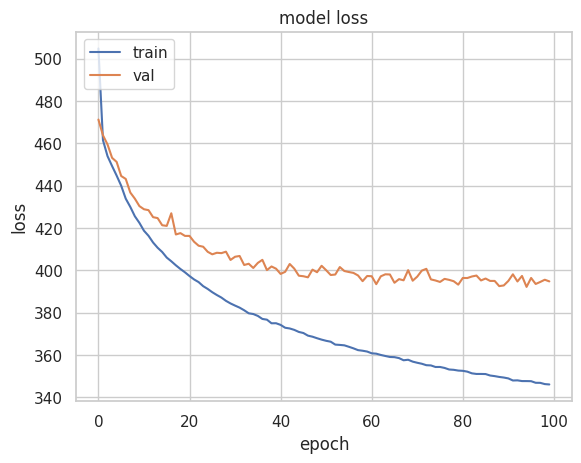

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

На графике видно, что модель начинает переобучаться, так как train_loss уменьшается стремительнее, чем val_loss

Посчитаем важность признаков с помощью permutation importance и визуализируем

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

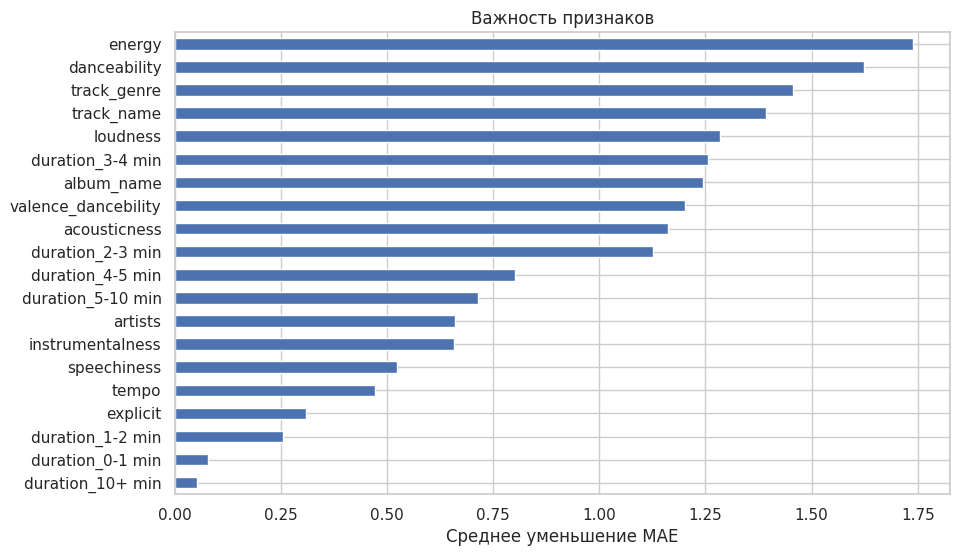

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Модель 2

In [ ]:
# Build the model
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,193 (235.13 KB)

 Trainable params: 60,193 (235.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 546.8674 - val_loss: 459.6006
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 455.7532 - val_loss: 449.6233
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 437.8143 - val_loss: 436.5226
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 430.4379 - val_loss: 428.8049
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 418.5398 - val_loss: 424.1411
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 411.1349 - val_loss: 419.2242
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 403.2732 - val_loss: 412.8440
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 395.9187 - val_loss: 406.6758
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 390.0670 - val_loss: 408.9007
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 384.6205 - val_loss: 405.7920
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 376

In [ ]:
# Evaluate the model
loss = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 431.9600
Test Loss: 437.61083984375


### Результаты обучения

In [ ]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [ ]:
y_test.shape

(22800,)

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model2.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MAE: 15.27
MSE: 437.61
RMSE: 20.92
R2: 0.12
MAPE: 11127469797056760.00%


1. **MAE (Mean Absolute Error) — Средняя абсолютная ошибка**
  * Это среднее значение абсолютных разностей между предсказанными и фактическими значениями. MAE показывает, насколько в среднем предсказания модели отличаются от реальных значений.
  * Чем меньше значение MAE, тем лучше модель. Если MAE = 0, то модель предсказывает точно.
2. **MSE (Mean Squared Error) — Среднеквадратичная ошибка**
  * Это среднее значение квадратов разностей между предсказанными и фактическими значениями. MSE усиливает влияние больших ошибок, поскольку они возводятся в квадрат.
  * Меньшее значение MSE указывает на лучшую модель. MSE = 0 означает, что модель идеально предсказывает данные. Эта метрика часто используется в задачах оптимизации модели.
3. **RMSE (Root Mean Squared Error) — Корень среднеквадратичной ошибки**
  * Это квадратный корень из MSE, который возвращает ошибку обратно в единицы измерения исходных данных.
  * RMSE помогает понять средний уровень ошибки в тех же единицах, что и исходные данные. Чем меньше RMSE, тем лучше модель. Оптимально, если RMSE близко к 0.
4. **R² (Коэффициент детерминации)**
  * Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значения R² варьируются от 0 до 1:
    * R² = 1: Модель идеально объясняет все изменения зависимой переменной.
    * R² = 0: Модель не объясняет вообще никакой дисперсии зависимой переменной, предсказывает только среднее значение.
    * R² < 0: Это возможно, если модель даёт худшие предсказания, чем простая модель с постоянным средним значением.
5. **MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка**
  * Она измеряет среднюю процентную ошибку предсказаний модели относительно фактических значений.
  * Чем меньше значение MAPE, тем точнее модель. Значение MAPE = 0% означает идеальную точность. Однако, в случае высоких значений или при работе с нулями в данных, MAPE может быть неустойчивым и вызывать аномальные результаты (как в вашем случае).



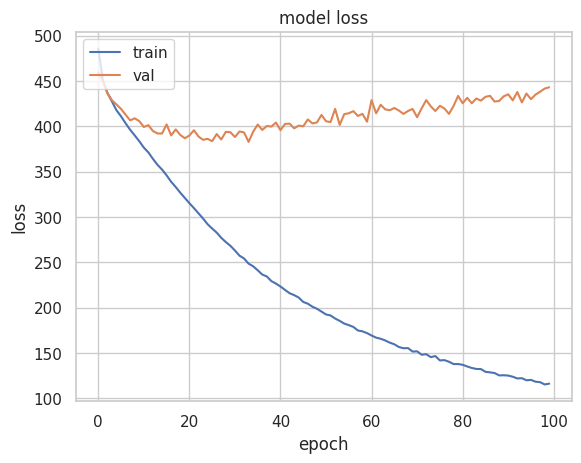

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

На графике видно, что модель переобучилась

Посчитаем важность признаков с помощью permutation importance и визуализируем

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

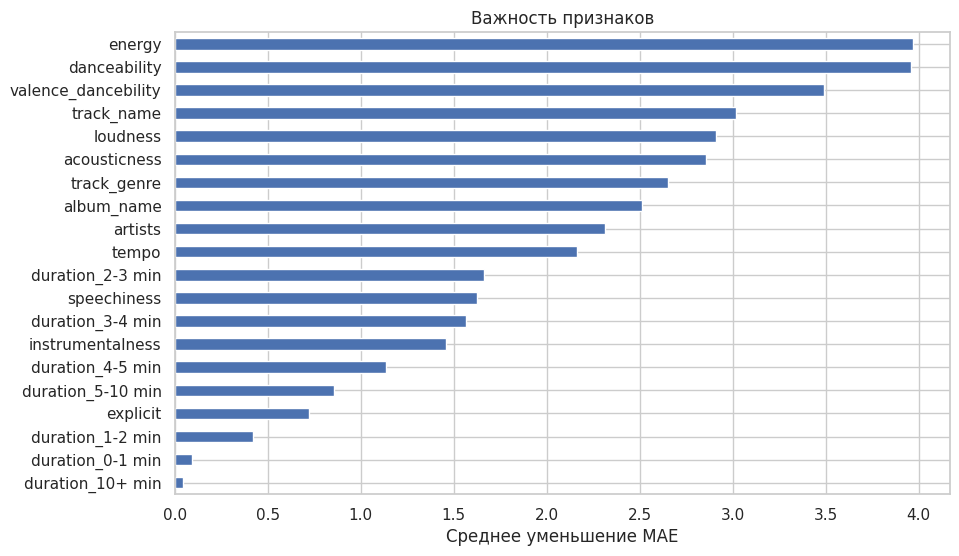

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model2, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Модель 3

In [111]:
# Build the model
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,193 (235.13 KB)

 Trainable params: 60,193 (235.13 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error')

In [114]:
# Train the model
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 637.4873 - val_loss: 490.8093
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 539.5308 - val_loss: 481.5462
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 526.4464 - val_loss: 464.1909
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 506.4482 - val_loss: 453.7771
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 502.5061 - val_loss: 439.1728
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 492.6573 - val_loss: 450.2350
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 482.8444 - val_loss: 437.8549
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 478.0601 - val_loss: 440.1470
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 476.1902 - val_loss: 436.5500
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 467.7526 - val_loss: 431.0559
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - los

In [115]:
# Evaluate the model
loss = model3.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 397.8941
Test Loss: 392.026611328125


### Результаты обучения

In [116]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [117]:
y_test.shape

(22800,)

In [118]:
# Прогнозирование на тестовой выборке
y_pred = model3.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MAE: 16.05
MSE: 392.03
RMSE: 19.80
R2: 0.21
MAPE: 17226882292364612.00%


1. **MAE (Mean Absolute Error) — Средняя абсолютная ошибка**
  * Это среднее значение абсолютных разностей между предсказанными и фактическими значениями. MAE показывает, насколько в среднем предсказания модели отличаются от реальных значений.
  * Чем меньше значение MAE, тем лучше модель. Если MAE = 0, то модель предсказывает точно.
2. **MSE (Mean Squared Error) — Среднеквадратичная ошибка**
  * Это среднее значение квадратов разностей между предсказанными и фактическими значениями. MSE усиливает влияние больших ошибок, поскольку они возводятся в квадрат.
  * Меньшее значение MSE указывает на лучшую модель. MSE = 0 означает, что модель идеально предсказывает данные. Эта метрика часто используется в задачах оптимизации модели.
3. **RMSE (Root Mean Squared Error) — Корень среднеквадратичной ошибки**
  * Это квадратный корень из MSE, который возвращает ошибку обратно в единицы измерения исходных данных.
  * RMSE помогает понять средний уровень ошибки в тех же единицах, что и исходные данные. Чем меньше RMSE, тем лучше модель. Оптимально, если RMSE близко к 0.
4. **R² (Коэффициент детерминации)**
  * Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значения R² варьируются от 0 до 1:
    * R² = 1: Модель идеально объясняет все изменения зависимой переменной.
    * R² = 0: Модель не объясняет вообще никакой дисперсии зависимой переменной, предсказывает только среднее значение.
    * R² < 0: Это возможно, если модель даёт худшие предсказания, чем простая модель с постоянным средним значением.
5. **MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка**
  * Она измеряет среднюю процентную ошибку предсказаний модели относительно фактических значений.
  * Чем меньше значение MAPE, тем точнее модель. Значение MAPE = 0% означает идеальную точность. Однако, в случае высоких значений или при работе с нулями в данных, MAPE может быть неустойчивым и вызывать аномальные результаты (как в вашем случае).



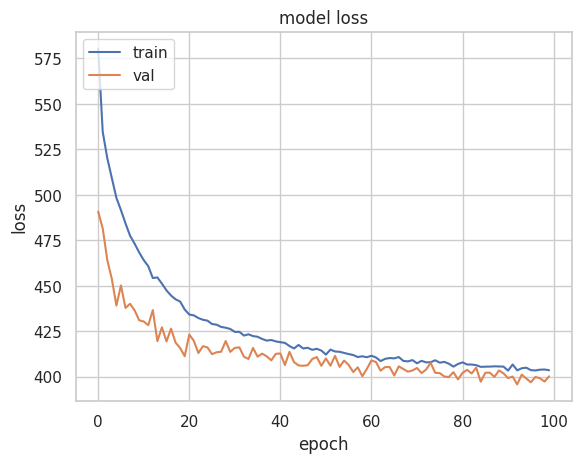

In [119]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Посчитаем важность признаков с помощью permutation importance и визуализируем

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━

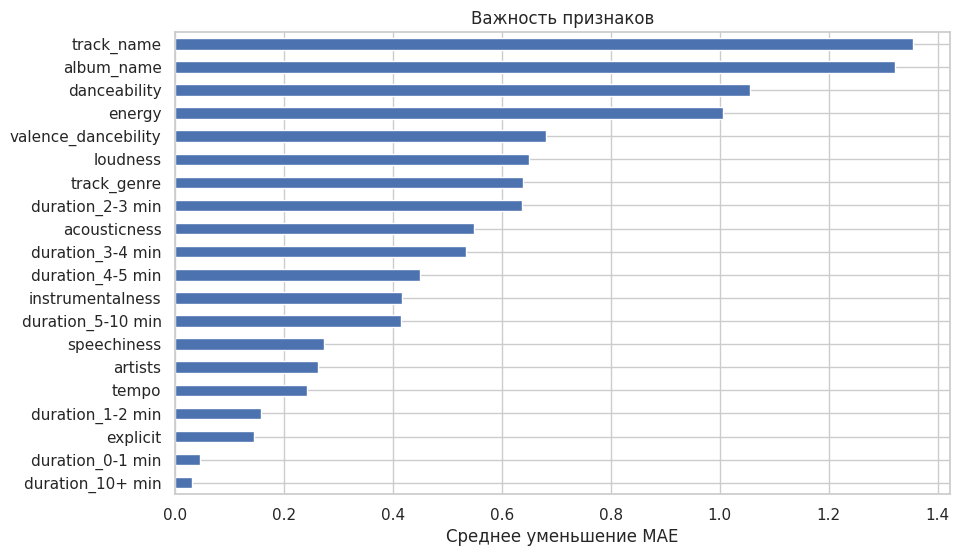

In [120]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model3, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Модель 4

In [ ]:
# Build the model
model4 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model4.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history4 = model4.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 628.6868 - val_loss: 488.6414
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 511.0146 - val_loss: 463.2226
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 501.6266 - val_loss: 458.2272
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 495.5635 - val_loss: 456.4443
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 489.2096 - val_loss: 453.7115
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 485.3674 - val_loss: 453.0276
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 486.2561 - val_loss: 453.4012
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 473.1469 - val_loss: 452.0038
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 473.2260 - val_loss: 449.9989
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 475.0195 - val_loss: 443.4684
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 

In [ ]:
# Evaluate the model
loss = model4.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 377.7959
Test Loss: 373.52508544921875


### Результаты обучения

In [ ]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [ ]:
y_test.shape

(22800,)

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model4.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 15.40
MSE: 373.53
RMSE: 19.33
R2: 0.25
MAPE: 15861174208005774.00%


1. **MAE (Mean Absolute Error) — Средняя абсолютная ошибка**
  * Это среднее значение абсолютных разностей между предсказанными и фактическими значениями. MAE показывает, насколько в среднем предсказания модели отличаются от реальных значений.
  * Чем меньше значение MAE, тем лучше модель. Если MAE = 0, то модель предсказывает точно.
2. **MSE (Mean Squared Error) — Среднеквадратичная ошибка**
  * Это среднее значение квадратов разностей между предсказанными и фактическими значениями. MSE усиливает влияние больших ошибок, поскольку они возводятся в квадрат.
  * Меньшее значение MSE указывает на лучшую модель. MSE = 0 означает, что модель идеально предсказывает данные. Эта метрика часто используется в задачах оптимизации модели.
3. **RMSE (Root Mean Squared Error) — Корень среднеквадратичной ошибки**
  * Это квадратный корень из MSE, который возвращает ошибку обратно в единицы измерения исходных данных.
  * RMSE помогает понять средний уровень ошибки в тех же единицах, что и исходные данные. Чем меньше RMSE, тем лучше модель. Оптимально, если RMSE близко к 0.
4. **R² (Коэффициент детерминации)**
  * Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значения R² варьируются от 0 до 1:
    * R² = 1: Модель идеально объясняет все изменения зависимой переменной.
    * R² = 0: Модель не объясняет вообще никакой дисперсии зависимой переменной, предсказывает только среднее значение.
    * R² < 0: Это возможно, если модель даёт худшие предсказания, чем простая модель с постоянным средним значением.
5. **MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка**
  * Она измеряет среднюю процентную ошибку предсказаний модели относительно фактических значений.
  * Чем меньше значение MAPE, тем точнее модель. Значение MAPE = 0% означает идеальную точность. Однако, в случае высоких значений или при работе с нулями в данных, MAPE может быть неустойчивым и вызывать аномальные результаты (как в вашем случае).



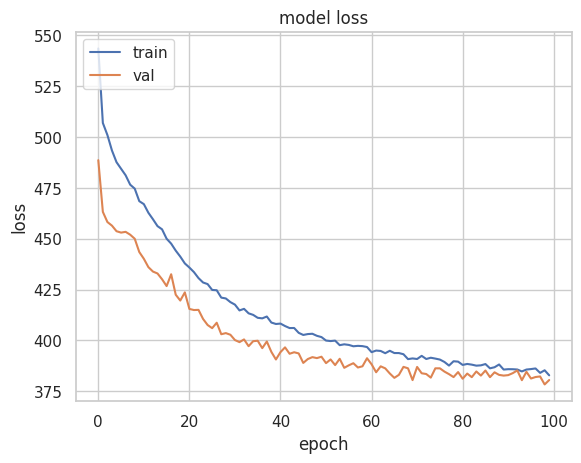

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Посчитаем важность признаков с помощью permutation importance и визуализируем

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━

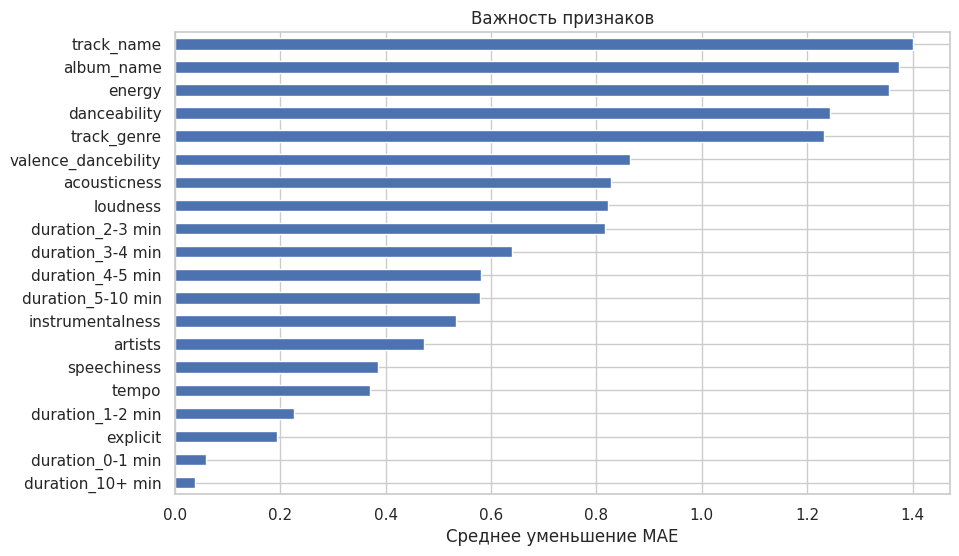

In [ ]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model4, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Модель 5

In [121]:
# Build the model
model5 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,729 (53.63 KB)

 Trainable params: 13,729 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
# Compile the model
model5.compile(optimizer='adam', loss='mean_squared_error')

In [124]:
# Train the model
history5 = model5.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 964.5067 - val_loss: 643.1315
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 660.0182 - val_loss: 484.0895
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 560.1215 - val_loss: 463.7897
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 533.5554 - val_loss: 461.0129
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 513.9573 - val_loss: 463.1697
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 502.9958 - val_loss: 452.3985
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 496.8588 - val_loss: 449.0446
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 488.7020 - val_loss: 439.9506
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 484.2195 - val_loss: 440.6820
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 481.9954 - val_loss: 433.5501
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 

In [125]:
# Evaluate the model
loss = model5.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 411.3500
Test Loss: 405.9721984863281


### Результаты обучения

In [126]:
y_test.value_counts()

,count
popularity,
0,3228
21,482
22,459
44,455
1,450
...,...
95,2
91,1
93,1


In [127]:
y_test.shape

(22800,)

In [128]:
# Прогнозирование на тестовой выборке
y_pred = model5.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 16.43
MSE: 405.97
RMSE: 20.15
R2: 0.18
MAPE: 17978316797787780.00%


1. **MAE (Mean Absolute Error) — Средняя абсолютная ошибка**
  * Это среднее значение абсолютных разностей между предсказанными и фактическими значениями. MAE показывает, насколько в среднем предсказания модели отличаются от реальных значений.
  * Чем меньше значение MAE, тем лучше модель. Если MAE = 0, то модель предсказывает точно.
2. **MSE (Mean Squared Error) — Среднеквадратичная ошибка**
  * Это среднее значение квадратов разностей между предсказанными и фактическими значениями. MSE усиливает влияние больших ошибок, поскольку они возводятся в квадрат.
  * Меньшее значение MSE указывает на лучшую модель. MSE = 0 означает, что модель идеально предсказывает данные. Эта метрика часто используется в задачах оптимизации модели.
3. **RMSE (Root Mean Squared Error) — Корень среднеквадратичной ошибки**
  * Это квадратный корень из MSE, который возвращает ошибку обратно в единицы измерения исходных данных.
  * RMSE помогает понять средний уровень ошибки в тех же единицах, что и исходные данные. Чем меньше RMSE, тем лучше модель. Оптимально, если RMSE близко к 0.
4. **R² (Коэффициент детерминации)**
  * Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значения R² варьируются от 0 до 1:
    * R² = 1: Модель идеально объясняет все изменения зависимой переменной.
    * R² = 0: Модель не объясняет вообще никакой дисперсии зависимой переменной, предсказывает только среднее значение.
    * R² < 0: Это возможно, если модель даёт худшие предсказания, чем простая модель с постоянным средним значением.
5. **MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка**
  * Она измеряет среднюю процентную ошибку предсказаний модели относительно фактических значений.
  * Чем меньше значение MAPE, тем точнее модель. Значение MAPE = 0% означает идеальную точность. Однако, в случае высоких значений или при работе с нулями в данных, MAPE может быть неустойчивым и вызывать аномальные результаты (как в вашем случае).



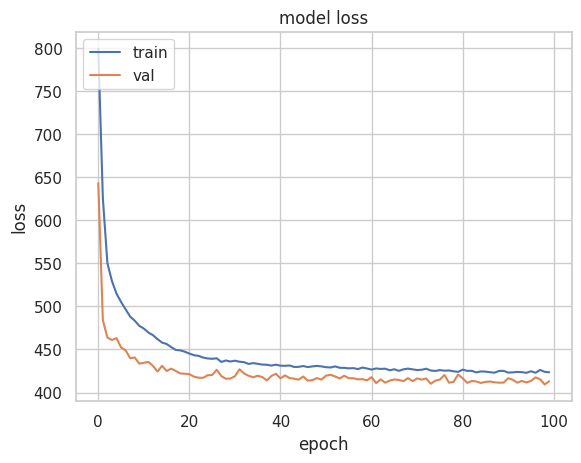

In [129]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Посчитаем важность признаков с помощью permutation importance и визуализируем

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

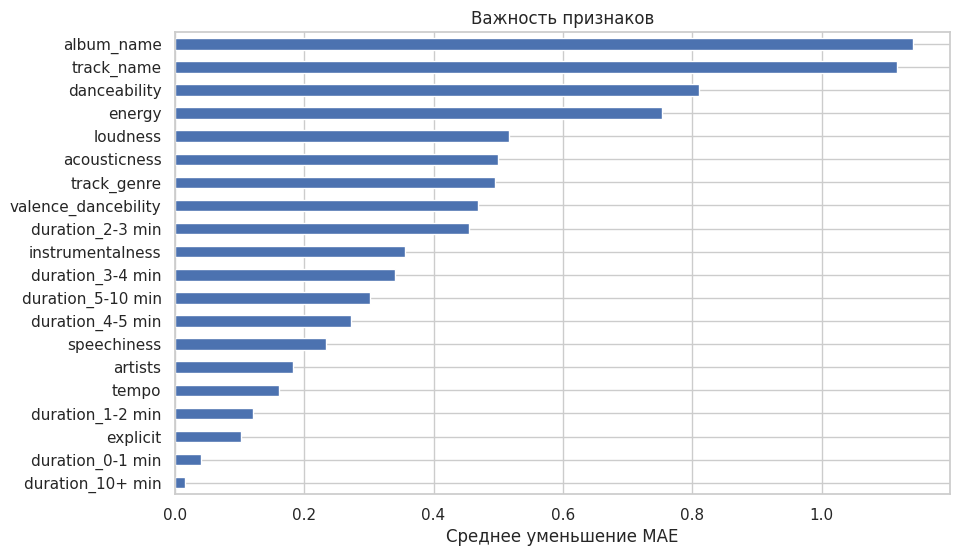

In [130]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model5, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()